In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import distance
from collections import Counter
import math
import seaborn as sns

%matplotlib inline

In [16]:
colnames = ['indice','pre','word','post']
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/final.csv', header = 4, names=colnames)
df = df[['pre','word','post']]
df['new'] = df['pre'] + (' ') + df['word']+ (' ') + df['post']
df['new'] = df['new'].str.lower()
df['drop'] = df['new'].str.find('seruus2 seruus2 deus ')
df = df[df['drop'] == -1]
df = df.reset_index()
df.pop('index')
df.pop('drop')
df.pop('new')

0       meus aliquis deus confero </s><s> trado itaque...
1       ipse2 hic3 -- apostolicus auctoritas priuilegi...
2       ut aliquis de res meus ad monasterium sanctus1...
3       interim uero1 ego ipse2 dum aduiuo inde soluo ...
4       aliquis de res meus proprius1 qui2 sum sino in...
                              ...                        
7218    infigo non habeo </s><s> nos denique hic3 dubi...
7219    <s> in -- hoba 2 </s><s> in -- hoba 3 mansus 2...
7220    terra quantum in uinea ille2 sum do is2 et suu...
7221    de -- -- -- -- super -- de -- debeo si qui2 su...
7222    adnoto contineo per ordo nam magnus de -- -- p...
Name: new, Length: 7223, dtype: object

In [18]:
seruus = 34235
mancipium = 4688
ancilla = 2852
serua = 2628
famulus = 2862
colonus = 299
sclauus = 283
seruula = 18

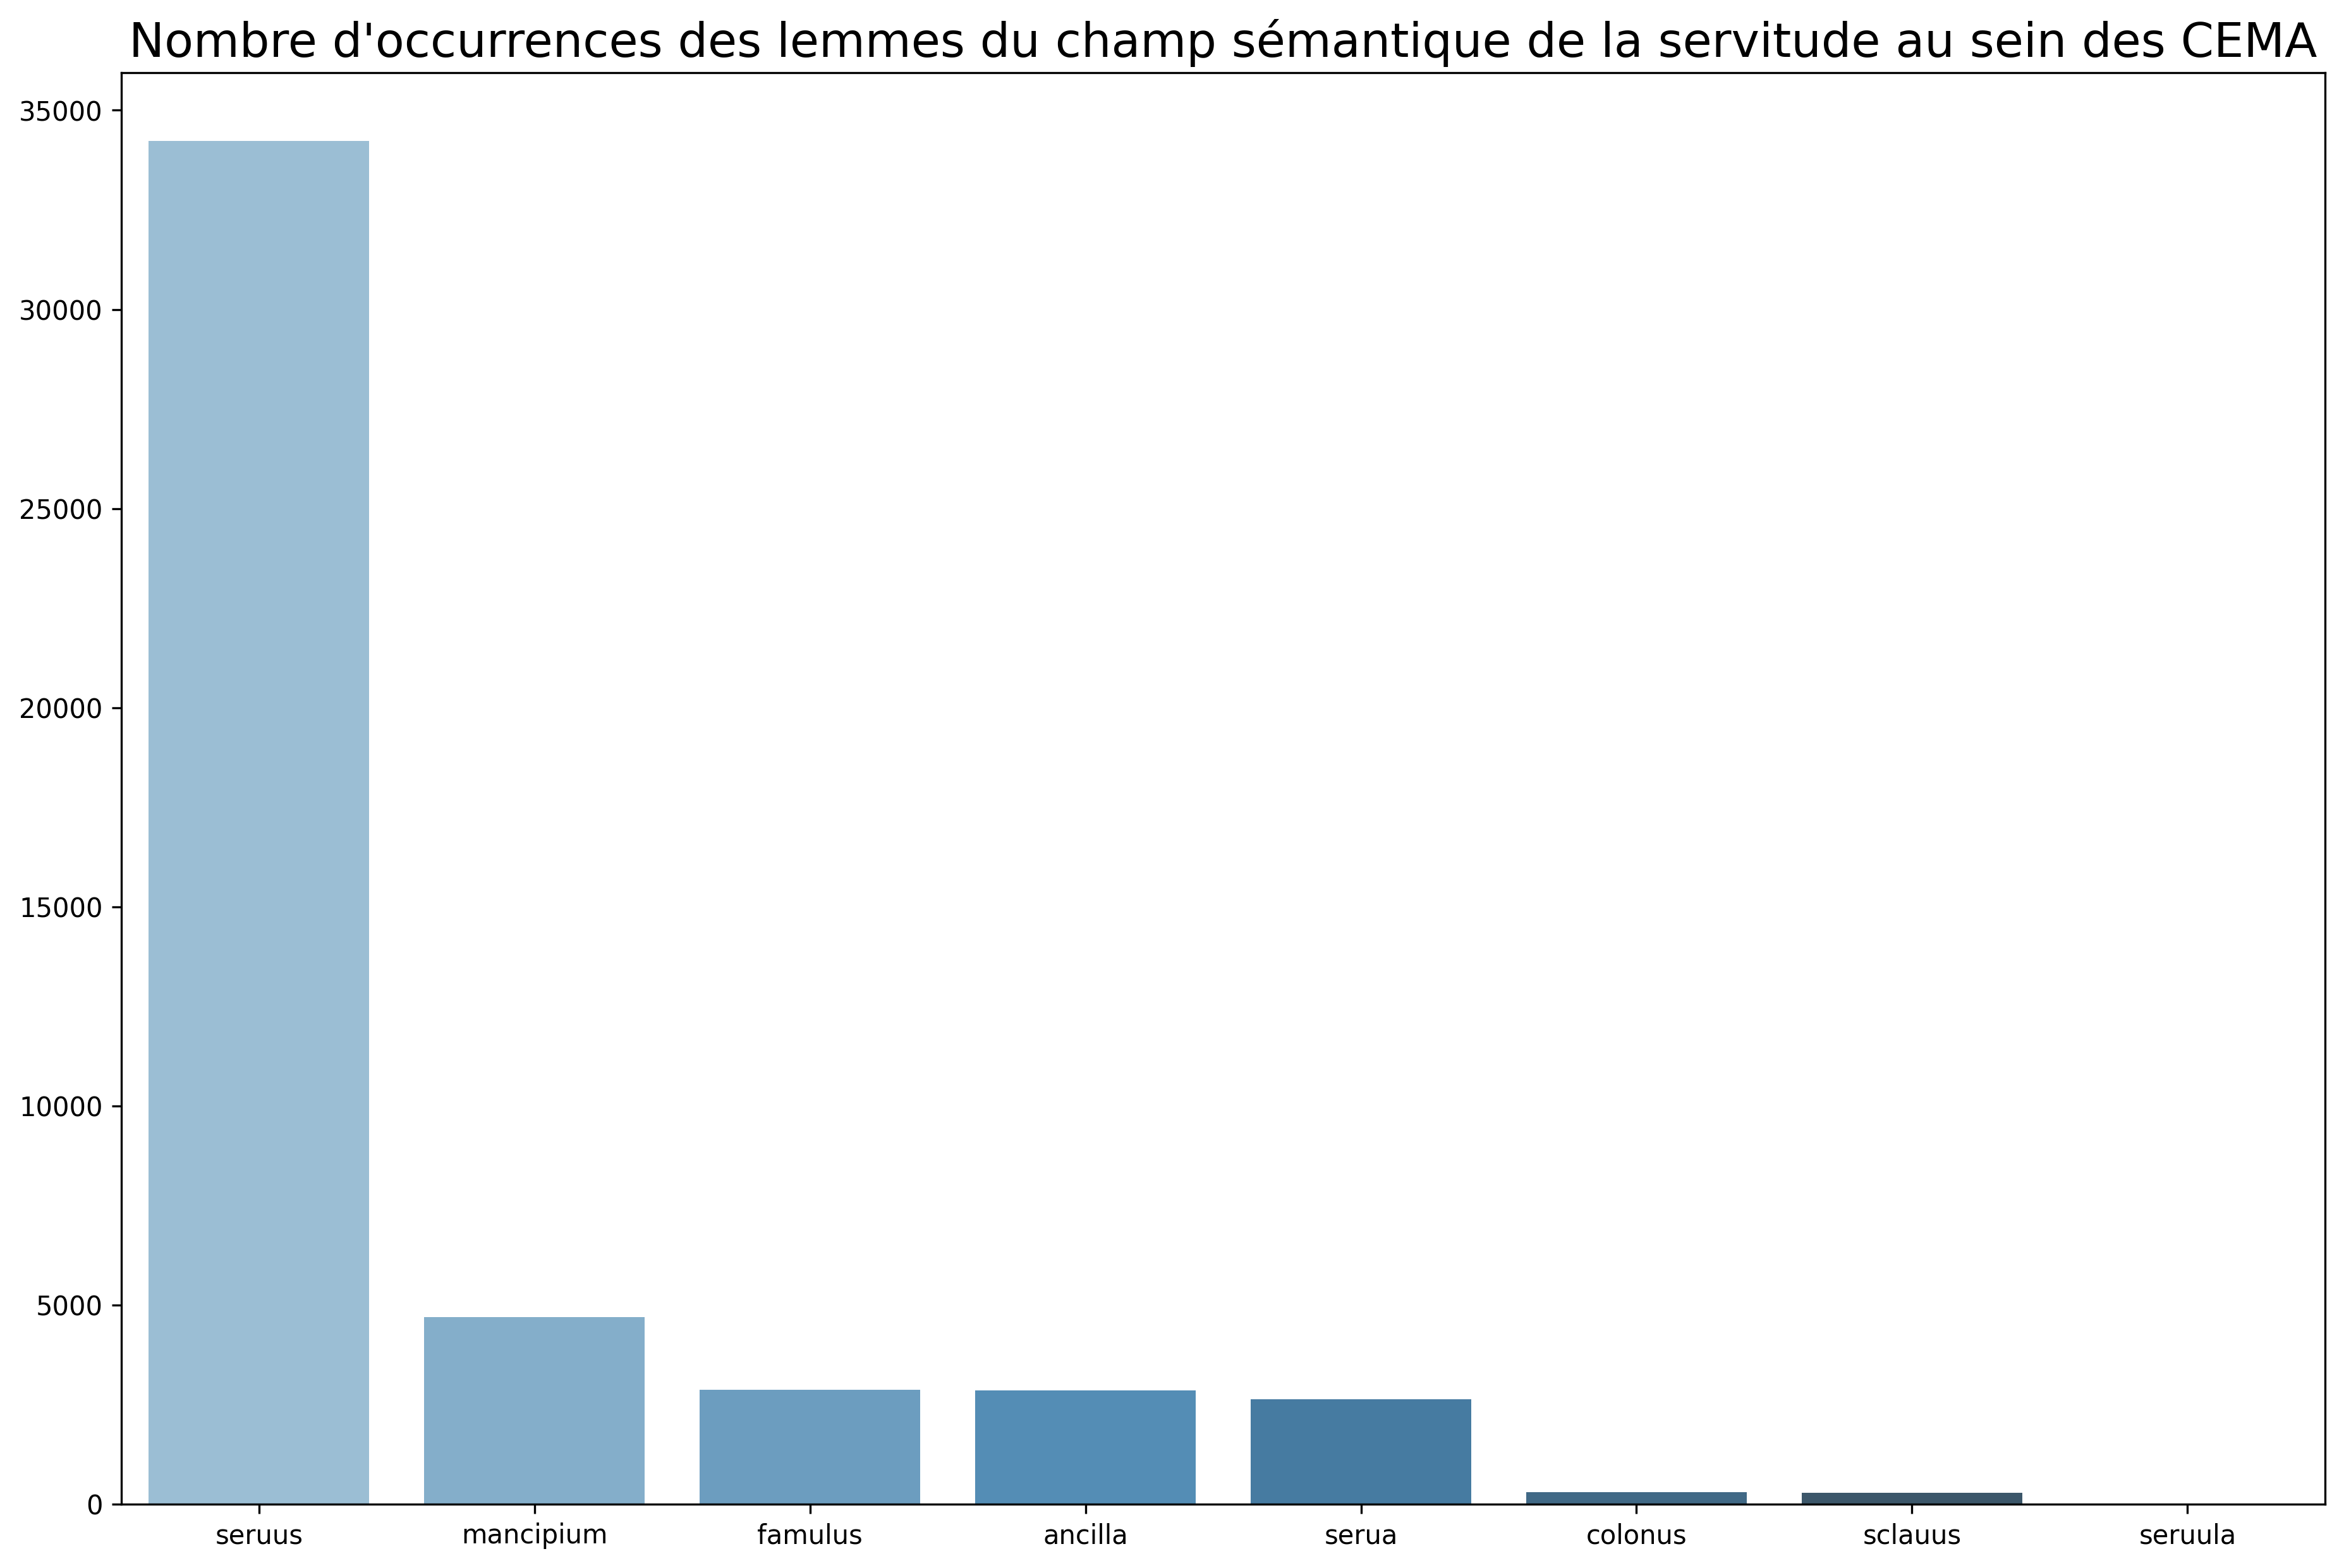

In [26]:
liste_freq = [seruus, mancipium, famulus, ancilla, serua, colonus, sclauus, seruula]
liste_noms = ["seruus", "mancipium", "famulus", "ancilla", "serua", "colonus", "sclauus", "seruula"]

plt.figure(figsize=(15,10), dpi=300)
sns.barplot(x=liste_noms,y=liste_freq,palette="Blues_d")
plt.title('Nombre d\'occurrences des lemmes du champ sémantique de la servitude au sein des CEMA', size=18)
plt.savefig('nbr_lemmes.png', dpi=300)

In [27]:
def tab_1(path):
    
    colonnes = ['indice','pre','lemma','post']
    df = pd.read_csv(path,sep=',', header=4, names=colonnes, encoding ='UTF-8')
    df['new'] = df['pre'] + (' ') + df['lemma']+ (' ') + df['post']
    df['new'] = df['new'].str.lower()
    df['drop'] = df['new'].str.find('seruus2 seruus2 deus')
    df = df[df['drop'] == -1]
    df = df.drop("drop", axis=1)
    df = df['indice'].value_counts()
    df = df.reset_index()
    df.columns = ['indice','occurrence']
    
    return(df)

In [29]:
def tab_2(path):
    colonnes = ['indice','pre','lemma','post']
    df = pd.read_csv(path, sep=',', header=4, names=colonnes, encoding ='UTF-8')
    
    df2 = df['indice'].str.replace(',' , ' ')
    df2 = df2.str.split()
    
    texte_final = []
    for i in texte:
        texte_final.append(i[1:])
    taille = []
    for i in texte_final:
        taille.append(len(i))
            
    dataframe = pd.read_csv(path2, sep=',', header=4, names=colonnes, encoding ='UTF-8')
    final = dataframe['indice'].value_counts()
    final = final.tolist()
    indice = dataframe['indice'].drop_duplicates()
    indice = indice.tolist()


    df_final = pd.DataFrame(list(zip(indice,final,taille,)))
    df_final.columns = ['indice','occurrence','nbr_tot_mots']
    
    df_final['TF-IDF'] = (df_final['occurrence']/df_final['nbr_tot_mots'])*(math.log10(244085/len(indice)))
    
    return(df_final)

In [30]:
final = pd.merge(df_final,df, on = 'indice')
final = final.drop('occurrence_x', axis=1)
final.columns = ['indice','nbr_tot_mots','TF-IDF','Occurrences']

NameError: name 'df_final' is not defined